### **Author: Bishal Kundu**

**GRIP @ THE SPARKS FOUNDATION**: Data Science and Business Analytics Internship

**Task 6: Prediction Using Decision Tree**

**Batch: July, 2024**

**Createing a Decison tree model to predict species from a scattered data**

In [ ]:
#Importing library
import pandas as pd

#importing data
url='/content/Iris.csv'
data=pd.read_csv(url)
print(data.head(10))

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
5   6            5.4           3.9            1.7           0.4  Iris-setosa
6   7            4.6           3.4            1.4           0.3  Iris-setosa
7   8            5.0           3.4            1.5           0.2  Iris-setosa
8   9            4.4           2.9            1.4           0.2  Iris-setosa
9  10            4.9           3.1            1.5           0.1  Iris-setosa


In [ ]:
#Missing values and Data Description
null=data.isnull().sum()
na=data.isna().sum()
des=data.describe()
null,na,des

(Id               0
 SepalLengthCm    0
 SepalWidthCm     0
 PetalLengthCm    0
 PetalWidthCm     0
 Species          0
 dtype: int64,
 Id               0
 SepalLengthCm    0
 SepalWidthCm     0
 PetalLengthCm    0
 PetalWidthCm     0
 Species          0
 dtype: int64,
                Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
 count  150.000000     150.000000    150.000000     150.000000    150.000000
 mean    75.500000       5.843333      3.054000       3.758667      1.198667
 std     43.445368       0.828066      0.433594       1.764420      0.763161
 min      1.000000       4.300000      2.000000       1.000000      0.100000
 25%     38.250000       5.100000      2.800000       1.600000      0.300000
 50%     75.500000       5.800000      3.000000       4.350000      1.300000
 75%    112.750000       6.400000      3.300000       5.100000      1.800000
 max    150.000000       7.900000      4.400000       6.900000      2.500000)

<Axes: >

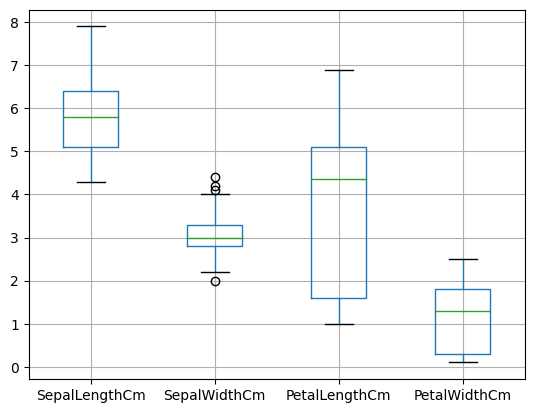

In [ ]:
#Outliers Checking
data.boxplot(column=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'])

In [ ]:
#Upper and Lower Whisker Values
IQR=3.3-2.8
UW=3.3+1.5*(IQR)
LW=2.8-1.5*(IQR)
UW,LW

(4.05, 2.05)

<Axes: >

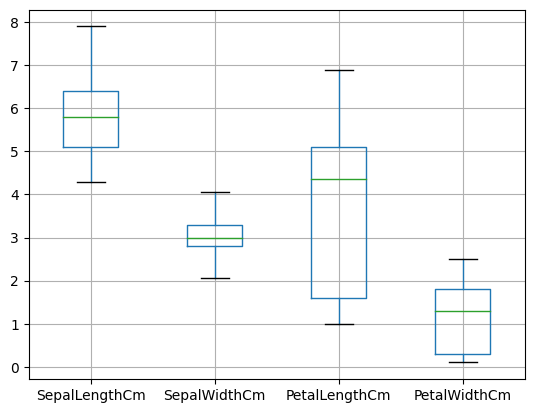

In [ ]:
#Removing outliers
data.loc[data['SepalWidthCm']>4.05, 'SepalWidthCm']=4.05
data.loc[data['SepalWidthCm']<2.05, 'SepalWidthCm']=2.05
data.boxplot(column=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'])

In [ ]:
#rearranging data
data=data.sample(frac=1).reset_index(drop=True)
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,75,6.4,2.9,4.3,1.3,Iris-versicolor
1,65,5.6,2.9,3.6,1.3,Iris-versicolor
2,35,4.9,3.1,1.5,0.1,Iris-setosa
3,1,5.1,3.5,1.4,0.2,Iris-setosa
4,72,6.1,2.8,4.0,1.3,Iris-versicolor


In [ ]:
#Creating Decision Tree
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.model_selection import train_test_split
tree=DecisionTreeClassifier()
x=data[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
y=data[['Species']]
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.4)
tree.fit(x,y)

DecisionTreeClassifier()

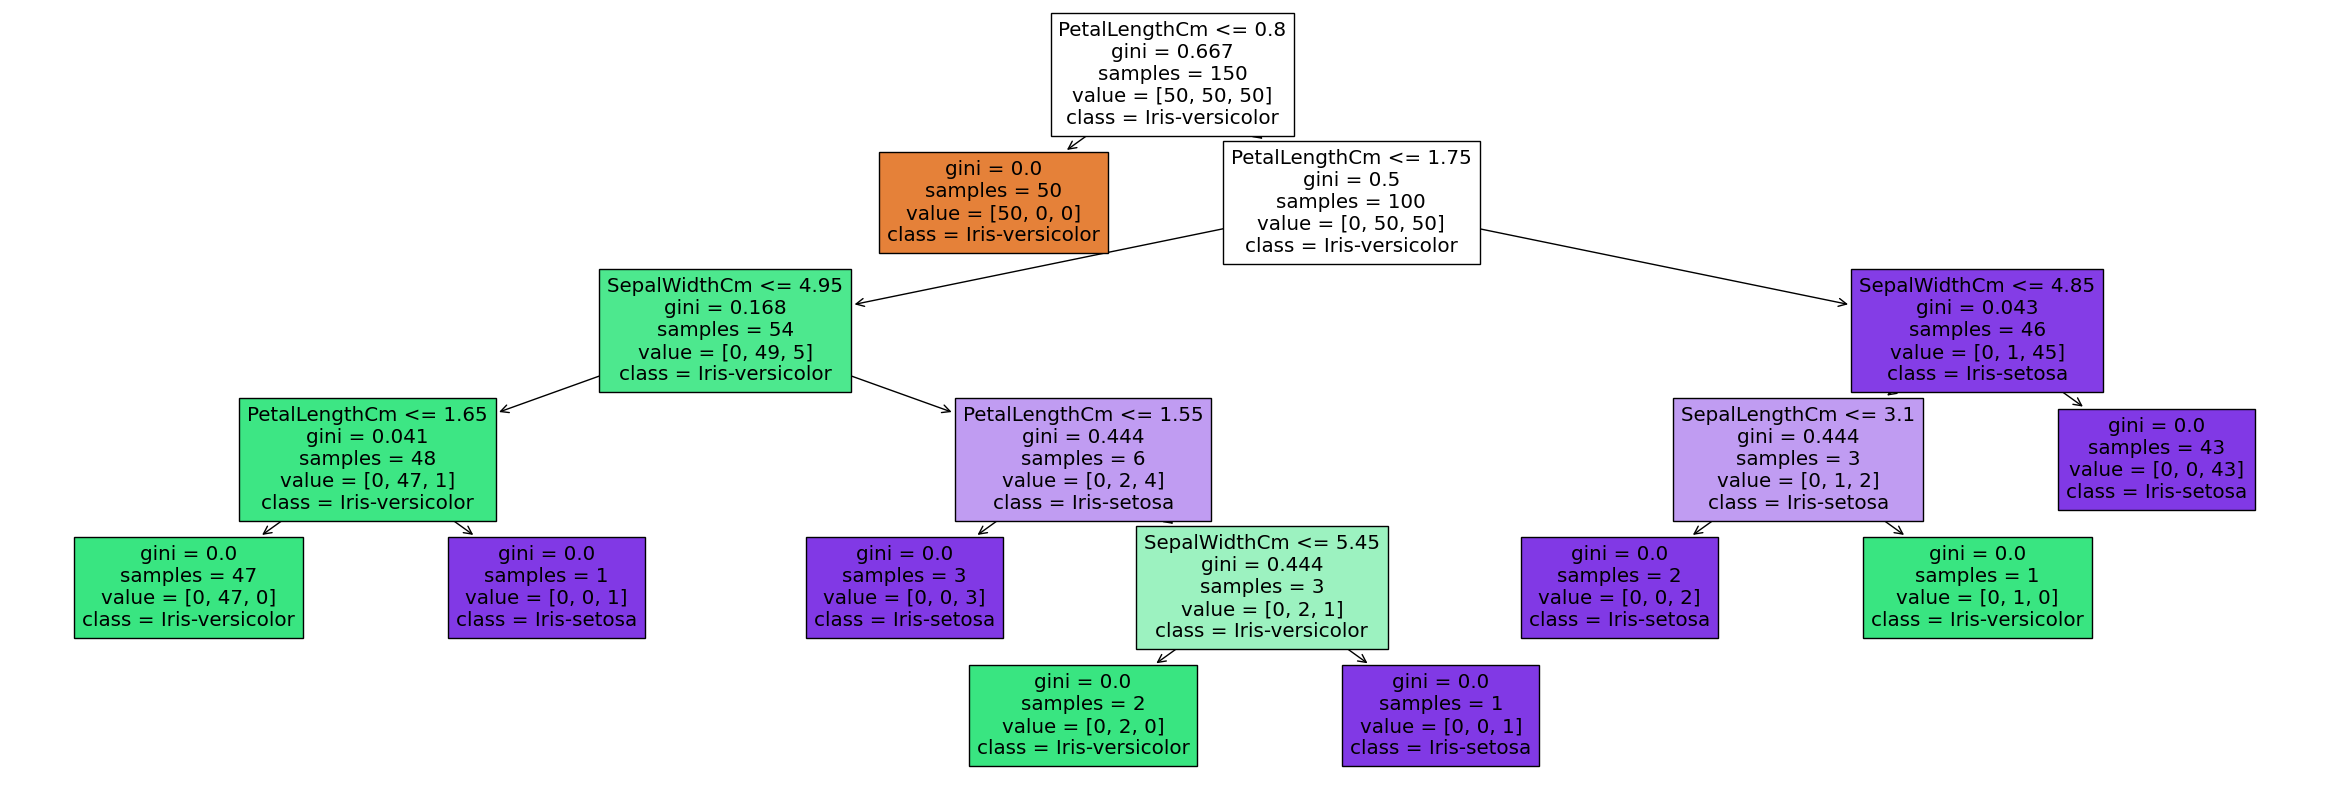

In [ ]:
#Decision tree Visualision
import matplotlib.pyplot as plt
plt.figure(figsize=(30,10))
plot_tree(tree, filled=True, feature_names=data.columns,
          class_names=data['Species'])
plt.show()

In [ ]:
data1=pd.DataFrame({'SepalLengthCm':[2.0],
                    'SepalWidthCm':[1.0],
                    'PetalLengthCm':[3.1],
                    'PetalWidthCm':[1.4]})
tree.predict(data1)

array(['Iris-versicolor'], dtype=object)